# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('Q1_clean.csv')
df['Neighbourhood'] = df['Neighbourhood ']
df.drop(columns=['Neighbourhood '])

,Price,Review Scores Rating,Property Type,Room Type,Neighbourhood
0,549,96.0,Apartment,Private room,Manhattan
1,149,100.0,Apartment,Entire home/apt,Brooklyn
2,250,100.0,Apartment,Entire home/apt,Manhattan
3,90,94.0,Apartment,Private room,Brooklyn
4,270,90.0,Apartment,Entire home/apt,Manhattan
...,...,...,...,...,...
22148,90,100.0,Apartment,Entire home/apt,Manhattan
22149,65,80.0,Apartment,Private room,Brooklyn
22150,55,100.0,Loft,Shared room,Brooklyn
22151,60,100.0,Apartment,Private room,Brooklyn


In [22]:
df.loc[:, ['Price','Neighbourhood']].groupby('Neighbourhood').describe()

Price                                                      \
                 count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                
Bronx            217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn        8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan      11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens          1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island     96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                        
                   max  
Neighbourhood           
Bronx            244.0  
Brooklyn        4500.0  
Manhattan      10000.0  
Queens           950.0  
Staten Island   5000.0

In [23]:
df.loc[:, ['Price','Review Scores Rating']].groupby('Review Scores Rating').describe()

Price                                                \
                       count        mean         std    min     25%    50%   
Review Scores Rating                                                         
20.0                    39.0   93.358974   51.385789   30.0   60.00   80.0   
30.0                     2.0   52.500000   24.748737   35.0   43.75   52.5   
40.0                    47.0  217.659574  717.243373   30.0   62.00   83.0   
43.0                     2.0   85.500000    6.363961   81.0   83.25   85.5   
47.0                     3.0   79.333333   49.561410   40.0   51.50   63.0   
49.0                     1.0  169.000000         NaN  169.0  169.00  169.0   
50.0                    19.0  133.526316   98.687705   40.0   51.00  105.0   
53.0                     8.0   92.000000   45.317925   40.0   63.50   85.0   
55.0                     3.0  193.333333  222.785397   50.0   65.00   80.0   
57.0                     2.0  200.000000  205.060967   55.0  127.50  200.0   
58.0                     2.0  122.500000   74.246212   70.0   96.25  122.5   
60.0                   244.0  117.495902   81.628260   25.0   63.75   90.0   
62.0                     5.0  125.000000   69.821200   40.0   70.00  130.0   
63.0                     5.0  134.800000   93.368624   35.0   49.00  140.0   
64.0                     4.0  115.750000   65.413429   40.0   85.00  112.5   
65.0                    21.0  154.142857  114.674010   45.0   65.00  100.0   
66.0                     3.0  193.333333   70.769579  150.0  152.50  155.0   
67.0                    42.0  136.452381  101.973503   35.0   65.00   94.5   
68.0                    19.0  171.000000  146.593921   32.0   75.00  149.0   
69.0                    11.0  118.272727   76.978037   50.0   60.00   95.0   
70.0                   132.0  145.242424  122.949758   35.0   70.00  100.0   
71.0                    22.0  129.863636   91.019776   30.0   56.50   94.5   
72.0                    32.0  125.000000   85.909179   40.0   53.75   97.0   
73.0                    89.0  129.595506  102.609777   38.0   65.00  100.0   
74.0                    26.0  162.461538  109.762373   34.0   81.25  139.5   
75.0                    60.0  125.466667   63.949256   32.0   75.00  122.5   
76.0                    75.0  188.400000  569.733010   30.0   65.00   95.0   
77.0                    80.0  122.987500   70.486105   35.0   78.50   99.0   
78.0                    84.0  134.238095  112.734000   38.0   65.00  103.0   
79.0                    46.0  121.891304   71.729810   39.0   73.50  100.0   
80.0                  1423.0  136.735770  100.408696   21.0   74.50  110.0   
81.0                    66.0  140.484848  108.305443   20.0   65.00  107.5   
82.0                   136.0  138.411765   85.618228   30.0   80.00  115.0   
83.0                   267.0  142.138577   90.408344   29.0   79.50  125.0   
84.0                   289.0  150.757785  105.637369   24.0   80.00  129.0   
85.0                   365.0  137.561644   85.194475   35.0   75.00  115.0   
86.0                   348.0  141.169540   76.348983   35.0   85.00  125.0   
87.0                   714.0  149.236695  132.321790   24.0   84.00  120.0   
88.0                   614.0  153.431596  115.515150   27.0   80.50  125.0   
89.0                   560.0  142.505357   90.622830   22.0   79.75  120.0   
90.0                  1729.0  146.110468  100.898653   27.0   80.00  120.0   
91.0                   812.0  148.125616  100.760800   35.0   85.00  125.0   
92.0                   875.0  153.625143  107.116369   28.0   89.00  125.0   
93.0                  1614.0  149.114622   98.071617   25.0   86.25  125.0   
94.0                   943.0  152.006363   98.660519   29.0   89.00  135.0   
95.0                  1295.0  165.102703  299.294985   30.0   90.00  135.0   
96.0                  1188.0  164.813973  123.604323   35.0   90.00  140.0   
97.0                  1033.0  166.631171  117.128501   26.0   94.00  150.0   
98.0                   842.0  177.937055  132

/Users/emilyrothrock/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


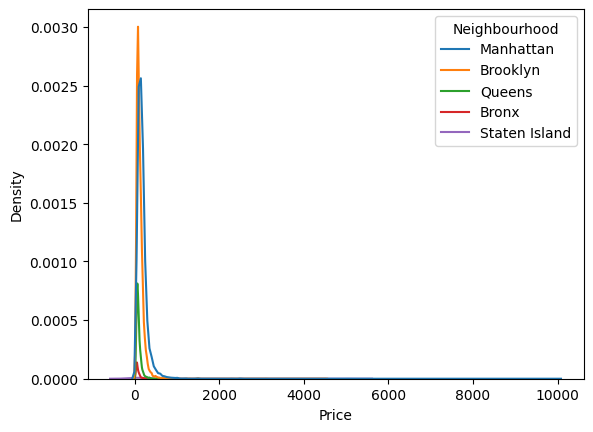

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x=df['Price'], hue=df['Neighbourhood'])
plt.show()

/Users/emilyrothrock/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


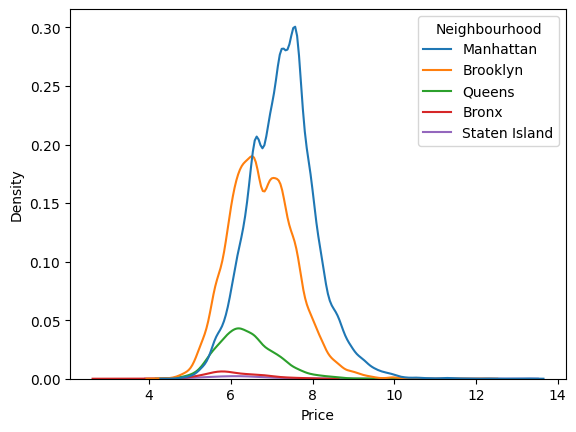

In [26]:
# RESOURCES
# https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/

sns.kdeplot(x=np.log2(df['Price']), hue=df['Neighbourhood'])
plt.show()

Looking at the data, it seems that Manhattan is the most expensive neighbourhood in it's average price, and in the 25th, 50th, and 75th percentile, which means it's more expensive almost always compared to other neighbourhoods. The kernal density plots support this as well.

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [29]:
from sklearn import linear_model

x = pd.get_dummies(df['Neighbourhood'], dtype='int')
y = df['Price']
reg = linear_model.LinearRegression(fit_intercept=False).fit(x,y)

result_df = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(result_df)

        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


It seems the coefficients are pretty close to the average price for each bourough in NYC

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [33]:
x = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)
y = df['Price']
reg = linear_model.LinearRegression().fit(x,y)

result_df = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(result_df, '\n')
print(f'Intercept: {reg.intercept_}')

        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169 

Intercept: 75.2764976958471


In this case, the dummies are created differently because we drop one of the columns: Bronx which in turn becomes the reference category. The intercept is 75.28 (rounded) which was the coefficient of the Bronx in the previous code block. By having the Bronx as the reference, all values change to be in reference to it. On the other hand, if you hadd the intercept to the coefficient, we can get the same coefficients as we first had with no intercept.

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [40]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df.loc[:,['Review Scores Rating', 'Neighbourhood'] ]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=100)

z_train = pd.concat([x_train['Review Scores Rating'], pd.get_dummies(x_train['Neighbourhood'], dtype='int')], axis = 1)
z_test = pd.concat([x_test['Review Scores Rating'], pd.get_dummies(x_test['Neighbourhood'], dtype='int')], axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(z_train,y_train) # Run regression
y_hat = reg.predict(z_test)

results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_}) # Regression coefficients
results

,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [39]:
r_sqaured = regression.score(z_test,y_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print(f'R^2: {r_sqaured}')
print(f'RMSE: {rmse}')

R^2: 0.06701086106947252
RMSE: 125.01092061382934


The best rated property one can rent is in Manhattan can be found by multiplying the review scores rating coefficient by 100 (since that's the best possible rating) and then add the coefficient for Manhattan to get 192.63 ((100 x 1.032257) + 89.421020)

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [48]:
x = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=100)

neighbourhood_dummies_train = pd.get_dummies(x_train['Neighbourhood '], dtype='int')
room_type_dummies_train = pd.get_dummies(x_train['Room Type'], dtype='int')
z_train = pd.concat([x_train['Review Scores Rating'], neighbourhood_dummies_train, room_type_dummies_train], axis = 1)

neighbourhood_dummies_test = pd.get_dummies(x_test['Neighbourhood '], dtype='int')
room_type_dummies_test = pd.get_dummies(x_test['Room Type'], dtype='int')
z_test = pd.concat([x_test['Review Scores Rating'], neighbourhood_dummies_test, room_type_dummies_test], axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(z_train,y_train)
y_hat = reg.predict(z_test)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [49]:
r_sqaured = regression.score(z_test,y_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print(f'R^2: {r_sqaured}')
print(f'RMSE: {rmse}')

R^2: 0.2203534812928234
RMSE: 114.27692123130632


To get what a 100-rated entire home/apt in Manhattan would cost, you have to add the entire home/apt coefficient with the Manhattan coefficient and add that value to 100 multiplied by the review scores rating coefficient to get 170.567 (110.617+53.69+(100*.0626))

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The coefficient on Review Scores Rating changes from part 4 to 5 because of use of residuals and the fact that in part 4, room types aren't being added into the regression versus in part 5 where it is.

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [122]:
cars = pd.read_csv('cars_hw.csv')

In [123]:
cars

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [124]:
import numpy as np

# cars['Price'] = cars.loc[:, ['Price']]/6 #I went and looked at the values of some of these cars and it seemed like dividing by 6 put them at a more reasonable price value
# I originally tried dividing by 6 but that gave me a crazy RMSE so I'm doing a sin function instead for Price and Mileage
cars['Price'] = np.arcsinh(cars['Price'])
cars['Age'] = max(cars['Make_Year'])-cars['Make_Year']
cars['Mileage'] = np.arcsinh(cars['Mileage_Run'])
cars.drop(columns=['Unnamed: 0', 'Mileage_Run'])

,Make,Make_Year,Color,Body_Type,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age,Mileage
0,Volkswagen,2017,silver,sedan,1st,5,diesel,7-Speed,Automatic,14.088586,5,11.398883
1,Hyundai,2016,red,crossover,1st,5,petrol,5-Speed,Manual,14.125932,6,10.611770
2,Honda,2019,white,suv,2nd,5,petrol,5-Speed,Manual,14.276726,3,10.986648
3,Renault,2017,bronze,hatchback,1st,5,petrol,5-Speed,Manual,13.626768,5,11.175493
4,Hyundai,2017,orange,hatchback,1st,5,petrol,5-Speed,Manual,13.845069,5,10.824806
...,...,...,...,...,...,...,...,...,...,...,...,...
971,Hyundai,2018,white,sedan,1st,5,petrol,6-Speed,Automatic,14.463660,4,10.773483
972,Hyundai,2019,white,sedan,1st,5,petrol,6-Speed,Automatic,14.535300,3,10.297622
973,Hyundai,2014,silver,sedan,1st,5,petrol,4-Speed,Automatic,14.202133,8,11.568284
974,Ford,2020,white,crossover,2nd,5,diesel,5-Speed,Automatic,14.219641,2,10.945000


2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

/Users/emilyrothrock/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


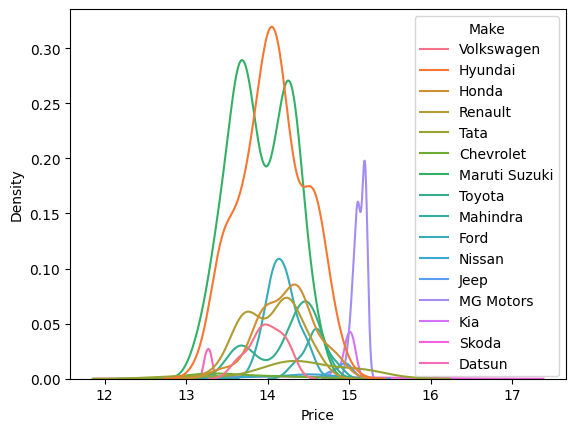

In [125]:
import seaborn as sns

sns.kdeplot(data = cars, x='Price', hue='Make')
cars['Price'].groupby(cars['Make']).describe()

It seems that Skodas, MG Motors, Kias, Hyundis and Jeeps are the most expensive.

3. Split the data into an 80% training set and a 20% testing set.

In [126]:
cars = cars.sample(frac=1, random_state=100)
N = cars.shape[0]
train_size = int(N*.8)

cars_train = cars[0:train_size]
y_train = cars_train['Price']

cars_test = cars[train_size:]
y_test = cars_test['Price']

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [128]:
# categorical
from sklearn import linear_model

var_cat = ['Fuel_Type','Transmission','Transmission_Type','Make','Body_Type','Color']

dummies = pd.DataFrame([])
for var in var_cat: 
    new_dummies = pd.get_dummies(cars.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    x_train_c = dummies.iloc[0:train_size,:]
    x_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(x_train_c,y_train) # Run regression
y_hat_c = reg_c.predict(x_test_c)
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
r_squared = reg_c.score(x_test_c,y_test)

print(f'R^2 Categorical Only: {r_squared}',)
print(f'RMSE Categorical Only: {rmse_n}')

R^2 Categorical Only: 0.6298129532407472
RMSE Categorical Only: 0.3339265473590647


In [129]:
# numeric
from sklearn import linear_model

var_n = ['Age','Mileage','Seating_Capacity']
x_train_n = cars_train.loc[:,var_n]
reg_n = linear_model.LinearRegression().fit(x_train_n,y_train)
x_test_n = cars_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(x_test_n)

r_squared = reg_n.score(x_test_n,y_test)
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print(f'R^2 Numeric Only: {r_squared}',)
print(f'RMSE Numeric Only: {rmse_n}')

R^2 Numeric Only: 0.45254262356326824
RMSE Numeric Only: 0.3339265473590647


In [133]:
#combined
x_train_all = pd.concat([x_train_n, x_train_c],axis=1, ignore_index=True)
x_test_all = pd.concat([x_test_n, x_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(x_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(x_test_all)
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
r_squared = reg_all.score(x_test_all,y_test)

print(f'R^2 All: {r_squared}',)
print(f'RMSE All: {rmse_n}')

R^2 All: 0.7999206763763922
RMSE All: 0.3339265473590647


What is weird is the RMSE is the same between all of them and only the R^2 value changes, so based on the R^2 it seems the numerical model works the best, and by a decent amount.

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [137]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    
    z = expander.fit_transform(x_test_n)
    names = expander.get_feature_names_out()
    x_test_d = pd.DataFrame(data=z, columns = names)
    z = expander.fit_transform(x_train_n)
    names = expander.get_feature_names_out()

    x_train_c.reset_index(drop=True, inplace=True)
    x_train_d = pd.DataFrame(data=z, columns = names)
    x_train_d.reset_index(drop=True, inplace=True)
    x_train_all = pd.concat([x_train_d, x_train_c], axis=1, ignore_index=True)

    x_test_c.reset_index(drop=True, inplace=True)
    x_test_d.reset_index(drop=True, inplace=True)
    x_test_all = pd.concat([x_test_d, x_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(x_train_all,y_train)
    y_hat_all = reg_all.predict(x_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    r_squared = reg_all.score(x_test_all,y_test)
    
    print(d, 'R^2: ', r_squared)
    print(d, 'RMSE: ', rmse_all)

1 R^2:  0.7999206763763922
1 RMSE:  0.2018723768619891
2 R^2:  0.8025408094604625
2 RMSE:  0.20054621389085842
3 R^2:  0.7996599800456063
3 RMSE:  0.2020038503576804
4 R^2:  -37168209010.27379
4 RMSE:  87008.4853553916


It seems the best is a degree of two with an R^2 of 0.8 and an RMSE of 0.2. After three the performance falls dramatically with the R^2 value for a degree of 2 being negative.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='Price'>

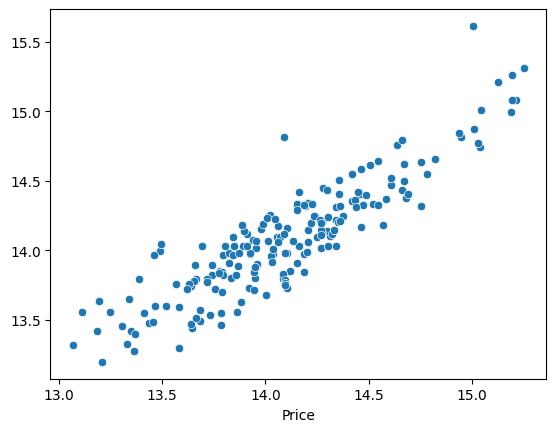

In [139]:
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
z = expander.fit_transform(x_test_n)
names = expander.get_feature_names_out()
x_test_d = pd.DataFrame(data=z, columns = names)

z = expander.fit_transform(x_train_n)
names = expander.get_feature_names_out()
x_train_d = pd.DataFrame(data=z, columns = names)

x_train_d.reset_index(drop=True, inplace=True)
x_train_c.reset_index(drop=True, inplace=True)
x_train_all = pd.concat([x_train_d, x_train_c], axis=1)
x_train_all.columns = x_train_all.columns.astype(str)

x_test_d.reset_index(drop=True, inplace=True)
x_test_c.reset_index(drop=True, inplace=True)
x_test_all = pd.concat([x_test_d, x_test_c], axis=1)
x_test_all.columns = x_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(x_train_all,y_train)
y_hat_all = reg_all.predict(x_test_all)
residuals = y_test - y_hat_all

sns.scatterplot(x=y_test,y=y_hat_all)

/Users/emilyrothrock/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

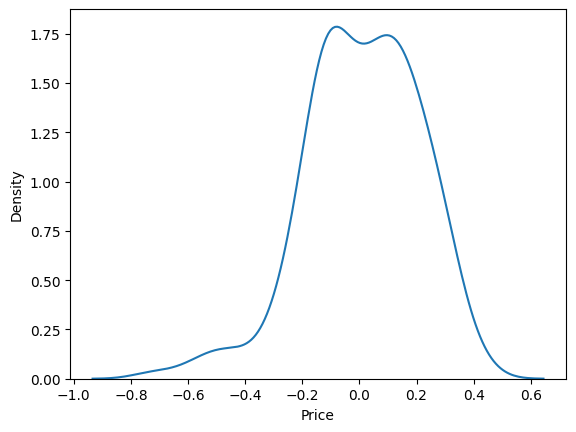

In [140]:
sns.kdeplot(residuals)

In [143]:
from sklearn import tree 

x_train_n.reset_index(drop=True, inplace=True)
x_train_c.reset_index(drop=True, inplace=True)
x_train_all = pd.concat([x_train_n, x_train_c],axis=1)
x_train_all.columns = x_train_all.columns.astype(str)
x_test_n.reset_index(drop=True, inplace=True)
x_test_c.reset_index(drop=True, inplace=True)
x_test_all = pd.concat([x_test_n, x_test_c],axis=1)
x_test_all.columns = x_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d) # Fit the classifier
    cart = model.fit(x_train_all, y_train) # 
    cart.score(x_test_all,y_test)
    y_hat = cart.predict(x_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print(f'Depth: {d}, RMSE: {rmse}, R^2: {cart.score(x_test_all,y_test)}')

Depth: 2, RMSE: 0.3014612490422251, R^2: 0.5538186573009447
Depth: 3, RMSE: 0.2708659626214631, R^2: 0.6397887383319321
Depth: 4, RMSE: 0.24859265755663462, R^2: 0.6965934082540732
Depth: 5, RMSE: 0.23551721719289098, R^2: 0.7276710948880613
Depth: 6, RMSE: 0.24243086639048012, R^2: 0.7114478964043167
Depth: 7, RMSE: 0.2273031442340537, R^2: 0.746335726853301
Depth: 8, RMSE: 0.25711294433717474, R^2: 0.6754390237009125
Depth: 9, RMSE: 0.21320885524917202, R^2: 0.7768181391231416
Depth: 10, RMSE: 0.2240031339607331, R^2: 0.7536477083651436
Depth: 11, RMSE: 0.2318506022037654, R^2: 0.7360845141778068
Depth: 12, RMSE: 0.2347461893106792, R^2: 0.7294512575454881
Depth: 13, RMSE: 0.26657109605010204, R^2: 0.6511212376981563
Depth: 14, RMSE: 0.23319033012775148, R^2: 0.7330256780727904
Depth: 15, RMSE: 0.27300252196901115, R^2: 0.6340837170083881
Depth: 16, RMSE: 0.23725179625494916, R^2: 0.7236449303309583
Depth: 17, RMSE: 0.26565193891276556, R^2: 0.6535230100919116
Depth: 18, RMSE: 0.2379

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.** 
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?